In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
%matplotlib inline
sns.set(style="whitegrid")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS108/isic_dermnet.csv")
data

,image_id,attribution,age_approx,anatom_site_general,dx,sex,lesion_id
0,ISIC_4695565,Hospital Italiano de Buenos Aires,75.0,posterior torso,akiec,female,IL_2485486
1,ISIC_4407081,Hospital Italiano de Buenos Aires,65.0,head/neck,akiec,female,IL_5173845
2,ISIC_6803155,Hospital Italiano de Buenos Aires,70.0,head/neck,akiec,male,IL_8876724
3,ISIC_6037786,Hospital Italiano de Buenos Aires,55.0,head/neck,akiec,female,IL_1728878
4,ISIC_4263601,Hospital Italiano de Buenos Aires,75.0,head/neck,akiec,male,IL_6263448
...,...,...,...,...,...,...,...
8703,bcc_37,NaN,NaN,NaN,bcc,NaN,DERMNETbcc_37
8704,bcc_38,NaN,NaN,NaN,bcc,NaN,DERMNETbcc_38
8705,bcc_39,NaN,NaN,NaN,bcc,NaN,DERMNETbcc_39
8706,bcc_40,NaN,NaN,NaN,bcc,NaN,DERMNETbcc_40


In [ ]:
print("\nShape of the dataset:")
data.shape


Shape of the dataset:


(8708, 7)

In [ ]:
# Understanding the data
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,image_id,attribution,age_approx,anatom_site_general,dx,sex,lesion_id
0,ISIC_4695565,Hospital Italiano de Buenos Aires,75.0,posterior torso,akiec,female,IL_2485486
1,ISIC_4407081,Hospital Italiano de Buenos Aires,65.0,head/neck,akiec,female,IL_5173845
2,ISIC_6803155,Hospital Italiano de Buenos Aires,70.0,head/neck,akiec,male,IL_8876724
3,ISIC_6037786,Hospital Italiano de Buenos Aires,55.0,head/neck,akiec,female,IL_1728878
4,ISIC_4263601,Hospital Italiano de Buenos Aires,75.0,head/neck,akiec,male,IL_6263448


In [ ]:
print("\nLast 5 rows of the dataset:")
data.tail()


Last 5 rows of the dataset:


,image_id,attribution,age_approx,anatom_site_general,dx,sex,lesion_id
8703,bcc_37,NaN,NaN,NaN,bcc,NaN,DERMNETbcc_37
8704,bcc_38,NaN,NaN,NaN,bcc,NaN,DERMNETbcc_38
8705,bcc_39,NaN,NaN,NaN,bcc,NaN,DERMNETbcc_39
8706,bcc_40,NaN,NaN,NaN,bcc,NaN,DERMNETbcc_40
8707,bcc_41,NaN,NaN,NaN,bcc,NaN,DERMNETbcc_41


In [ ]:
print("\nNumber of unique values in each column:")
data.nunique()


Number of unique values in each column:


image_id               8708
attribution              11
age_approx               17
anatom_site_general       8
dx                        7
sex                       2
lesion_id              5526
dtype: int64

In [ ]:
print("\nUnique values in the 'sex' column:")
data['sex'].unique()


Unique values in the 'sex' column:


array(['female', 'male', nan], dtype=object)

In [ ]:
# Checking for duplicate entries
print("\nNumber of duplicate entries:")
data.duplicated().sum()


Number of duplicate entries:


0

In [ ]:
# Checking for missing values
print("\nMissing values in each column:")
data.isnull().sum()


Missing values in each column:


image_id                  0
attribution             108
age_approx              416
anatom_site_general    1140
dx                        0
sex                     411
lesion_id              1129
dtype: int64

In [ ]:
import pandas as pd

# Impute missing age with the mean (assuming it's numerical)
data['age_approx'].fillna(data['age_approx'].mean(), inplace=True)

# Impute missing attribution with the mode (assuming it's categorical)
data['attribution'].fillna(data['attribution'].mode()[0], inplace=True)

# Forward fill missing anatomical_site_general
data['anatom_site_general'].fillna(method='ffill', inplace=True)

# Drop rows with missing lesion_id (assuming it's an important identifier)
data.dropna(subset=['lesion_id'], inplace=True)

In [ ]:
most_frequent_sex = data['sex'].mode()[0]  # Get the most frequent sex
data['sex'].fillna(most_frequent_sex, inplace=True)

In [ ]:
# Checking for missing values
print("\nMissing values in each column:")
data.isnull().sum()


Missing values in each column:


image_id               0
attribution            0
age_approx             0
anatom_site_general    0
dx                     0
sex                    0
lesion_id              0
dtype: int64

In [ ]:
# Check for unique values in categorical columns
for i in data.select_dtypes(include='object').columns:
  print(data[i].value_counts())
  print('___'*11)

image_id
ISIC_4695565    1
ISIC_2061233    1
ISIC_8311079    1
ISIC_0554180    1
ISIC_0199971    1
               ..
ISIC_7429270    1
ISIC_5382111    1
ISIC_7102039    1
ISIC_2010209    1
bcc_41          1
Name: count, Length: 8708, dtype: int64
_________________________________
attribution
Hospital Clínic de Barcelona                                                                                    3062
Memorial Sloan Kettering Cancer Center                                                                          1743
ViDIR Group, Department of Dermatology, Medical University of Vienna                                            1291
Hospital Italiano de Buenos Aires                                                                               1154
Anonymous                                                                                                        309
Sydney Melanoma Diagnostic Center at Royal Prince Alfred Hospital, Pascale Guitera                               306
"Repe

In [ ]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

Text(0.5, 1.0, 'Frequency Distribution of Classes')

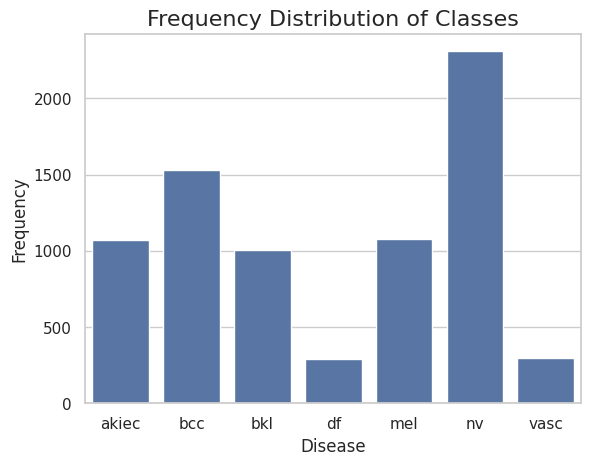

In [ ]:
# Frequency Distribution of Classes

sns.countplot(x = 'dx', data = data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

Text(0.5, 1.0, 'Lesion Type of Patient')

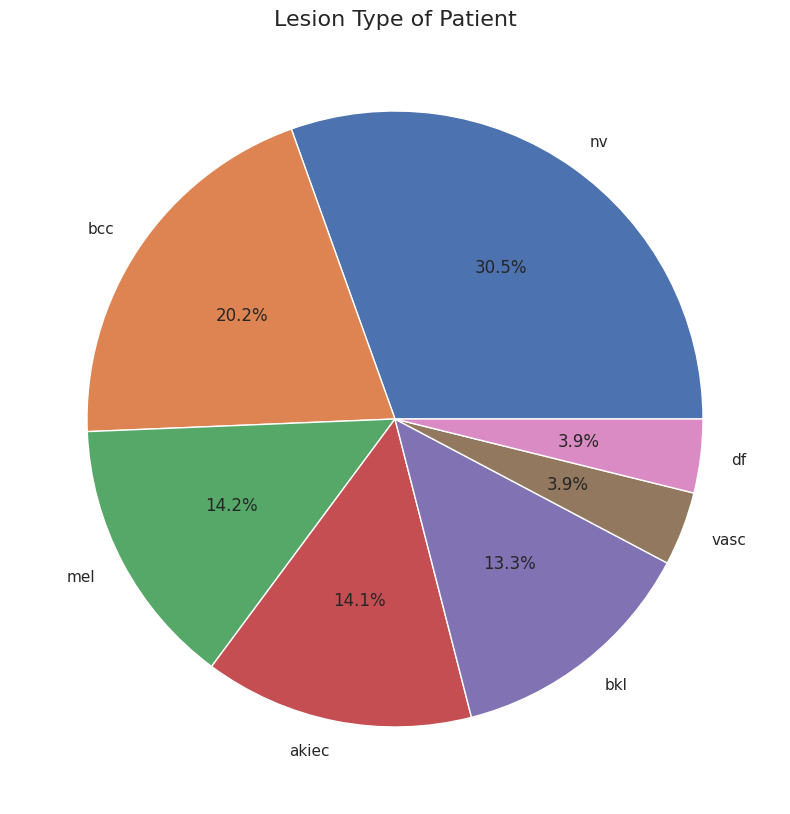

In [ ]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(data['dx'].value_counts(), labels = data['dx'].value_counts().index, autopct="%.1f%%")
plt.title('Lesion Type of Patient', size=16)

Text(0.5, 1.0, 'Gender of Patient')

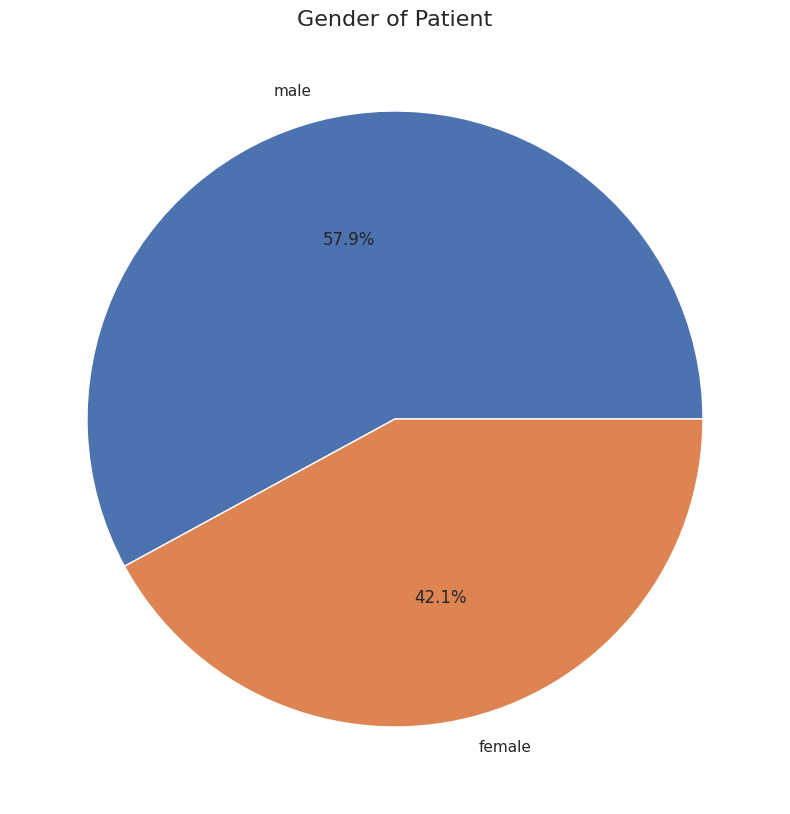

In [ ]:
# Distribution of Disease over Gender

bar, ax = plt.subplots(figsize = (10,10))
plt.pie(data['sex'].value_counts(), labels = data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

Text(0.5, 1.0, 'Localization of Patient')

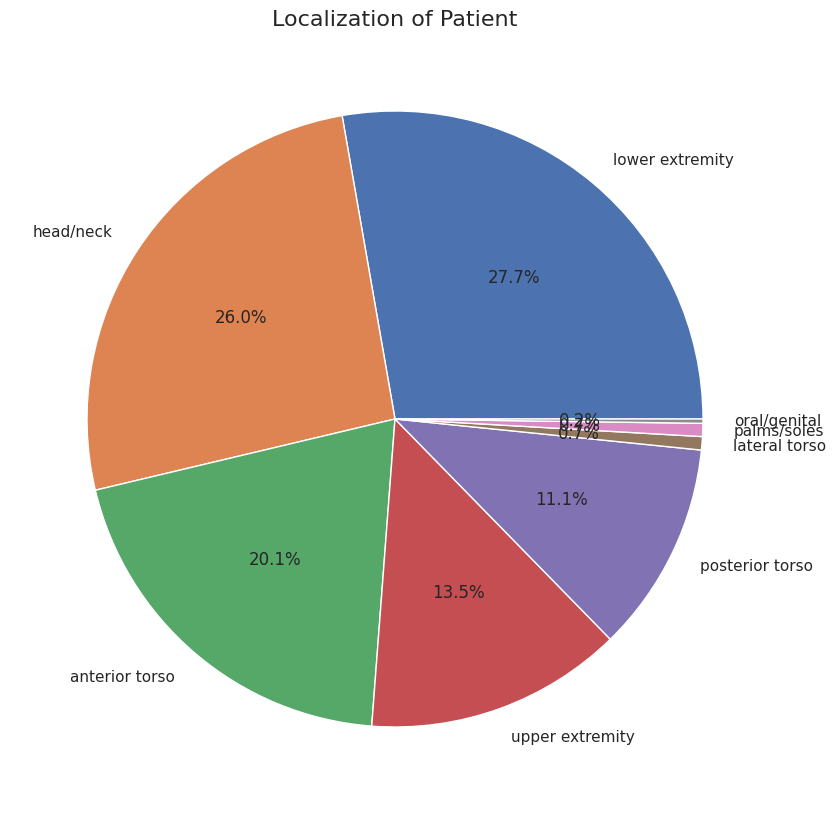

In [ ]:
# Distribution of Disease over Gender

bar, ax = plt.subplots(figsize = (10,10))
plt.pie(data['anatom_site_general'].value_counts(), labels = data['anatom_site_general'].value_counts().index, autopct="%.1f%%")
plt.title('Localization of Patient', size=16)

In [ ]:
print("\nDescriptive statistics of the dataset:")
data.age_approx.describe()


Descriptive statistics of the dataset:


count    8292.000000
mean       58.517246
std        16.480873
min         5.000000
25%        45.000000
50%        60.000000
75%        70.000000
max        85.000000
Name: age_approx, dtype: float64

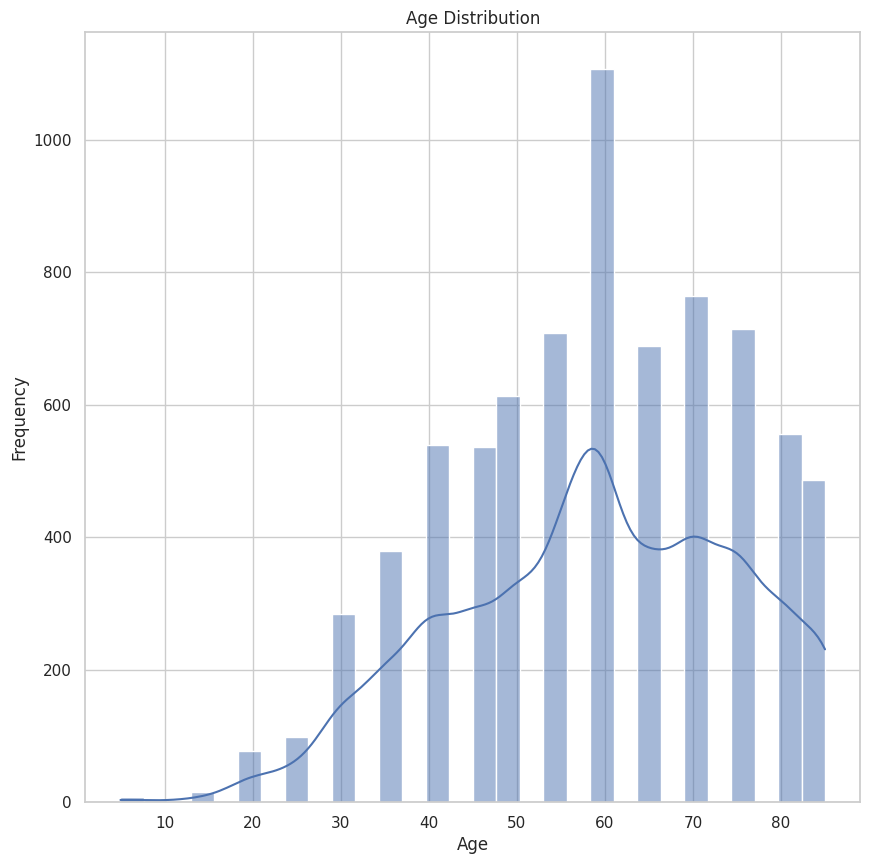

In [ ]:
# Histogram for age
plt.figure(figsize=(10, 10))
sns.histplot(data['age_approx'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='dx'>

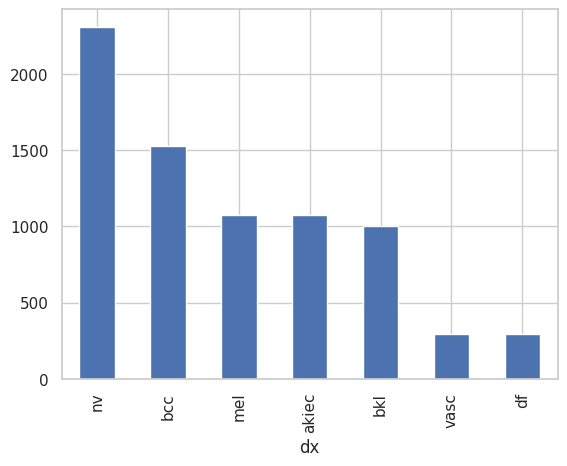

In [ ]:
# Diagnosis Test type distribution
data['dx'].value_counts().plot(kind='bar')

Chi-squared test:
Chi2: 30.434403664844048
p-value: 3.2495502358544804e-05
Degrees of freedom: 6
Expected frequencies: [[ 450.92175749  621.07824251]
 [ 643.57303074  886.42696926]
 [ 422.73914764  582.26085236]
 [ 123.24633857  169.75366143]
 [ 452.60430136  623.39569864]
 [ 971.24844966 1337.75155034]
 [ 123.66697453  170.33302547]]


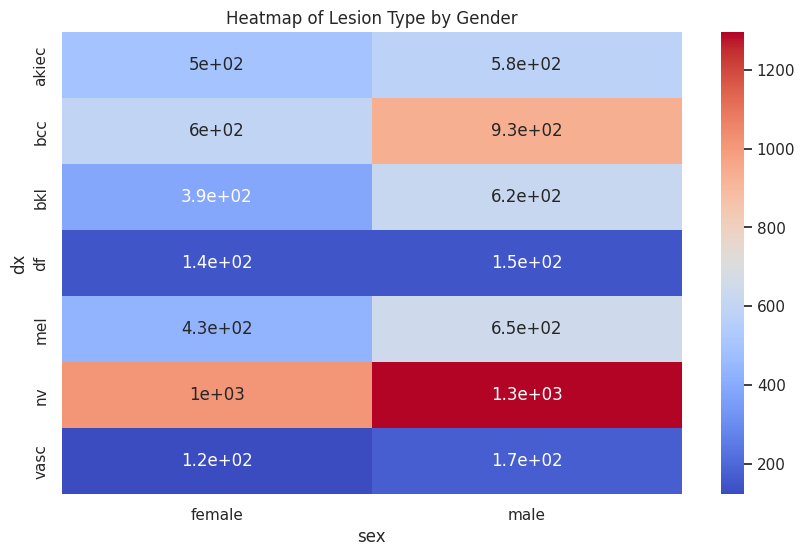

In [ ]:
# Crosstab and Chi-squared test
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(data['dx'], data['sex'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-squared test:")
print("Chi2:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

# Heatmap for crosstab
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='coolwarm')
plt.title('Heatmap of Lesion Type by Gender')
plt.show()


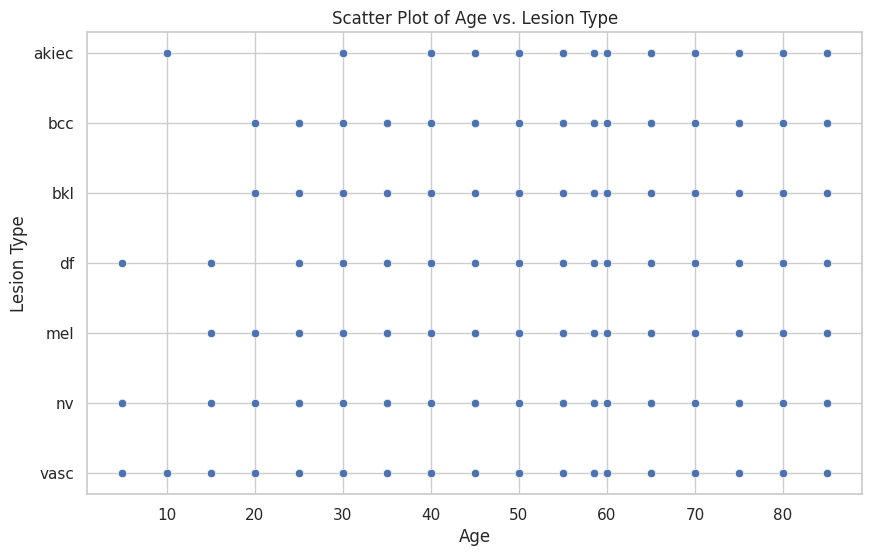

In [ ]:
# Scatter plot of age vs. lesion type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_approx', y='dx', data=data)
plt.title('Scatter Plot of Age vs. Lesion Type')
plt.xlabel('Age')
plt.ylabel('Lesion Type')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'head/neck'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'anterior torso'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'posterior torso'),
  Text(5, 0, 'palms/soles'),
  Text(6, 0, 'lateral torso'),
  Text(7, 0, 'oral/genital')])

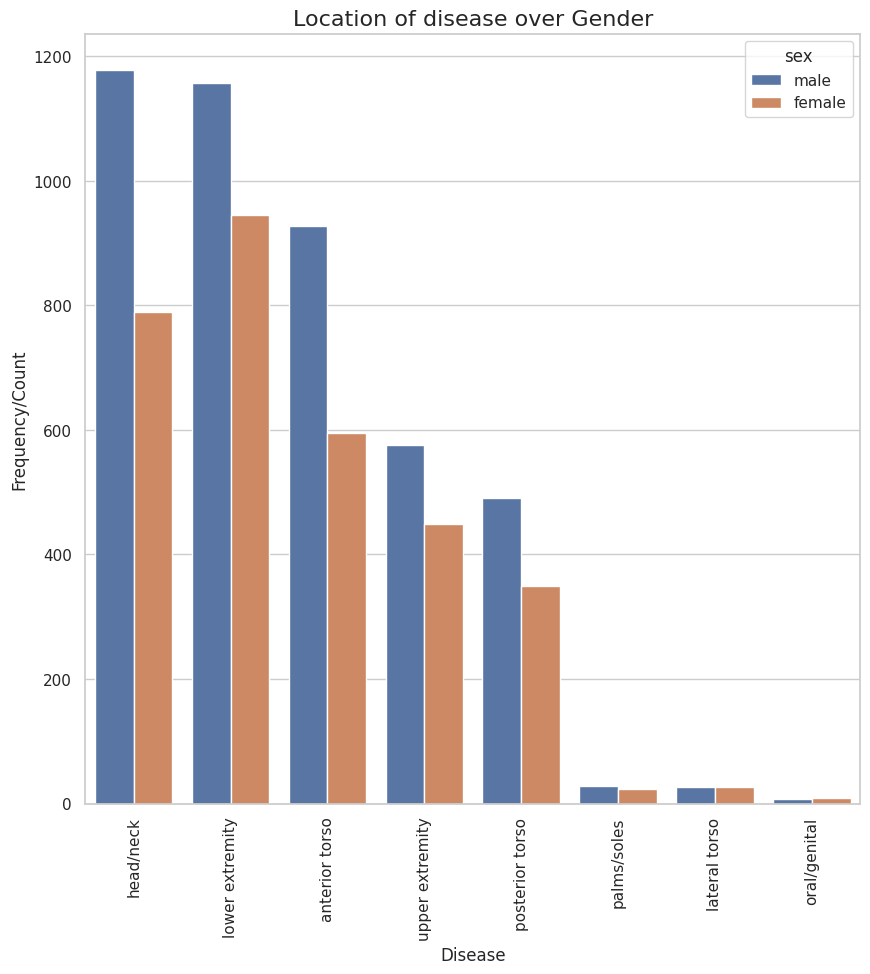

In [ ]:
# Location of disease over Gender

value = data[['anatom_site_general', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'anatom_site_general', 0: 'count'})

bar, ax = plt.subplots(figsize = (10, 10))
sns.barplot(x = 'anatom_site_general',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

<Figure size 1200x600 with 0 Axes>

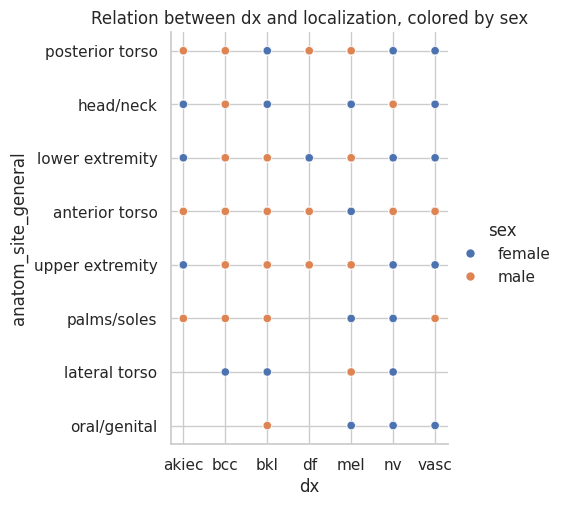

In [ ]:
# Relational plot for dx and localization, colored by sex
plt.figure(figsize=(12, 6))
sns.relplot(x='dx', y='anatom_site_general', hue='sex', data=data)
plt.title("Relation between dx and localization, colored by sex")
plt.show()

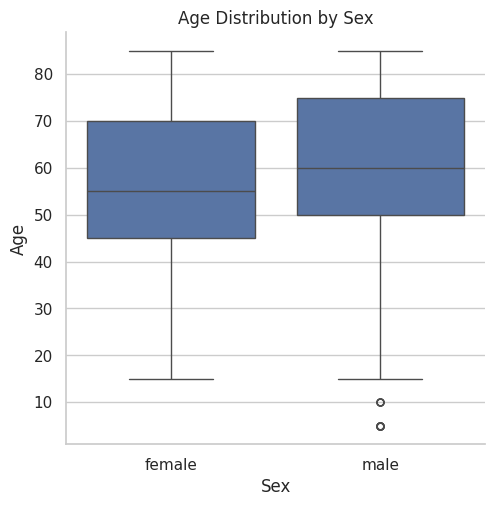

In [ ]:
sns.catplot(
    x="sex",  # Replace with your desired categorical variable
    y="age_approx",  # Replace with your desired numeric variable
    data=data,
    kind="box",  # Choose plot type (box, strip, swarm, etc.)
)
plt.title("Age Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()